In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("dataset_phishing.csv")
df=df.drop('url', axis=1)
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


# EDA/Data Exploration

In [63]:
# shape of the dataset
print("Shape:", df.shape)

Shape: (11430, 88)


In [64]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

In [65]:
# descriptive statistics of numerical columns
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [66]:
df.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

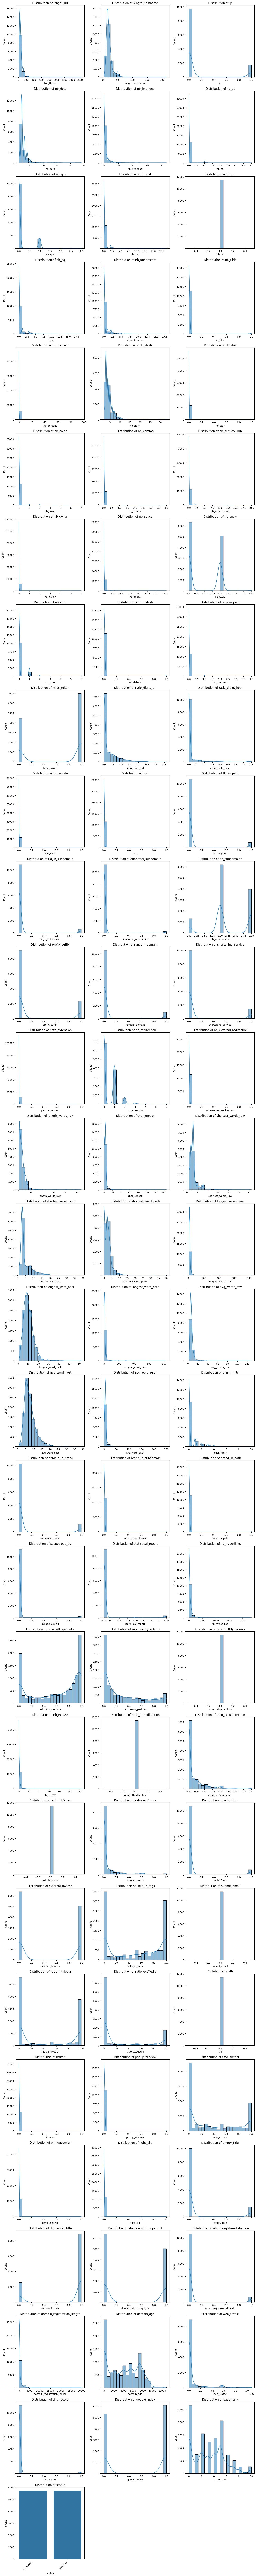

In [67]:
# Data Distribution/Visualization
def plot_all_columns(df):
    num_cols = len(df.columns)
    num_rows = (num_cols + 2) // 3
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

    for i, col in enumerate(df.columns):
        row = i // 3
        col_num = i % 3
        ax = axes[row, col_num]
        if df[col].dtype in [int, float]:
            sns.histplot(df[col], bins=20, kde=True, ax=ax)
        else:
            sns.countplot(x=col, data=df, ax=ax)
            ax.set_xticks(ax.get_xticks())
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_title(f'Distribution of {col}')

    # Hide unused subplots
    for i in range(num_cols, num_rows * 3):
        row = i // 3
        col_num = i % 3
        axes[row, col_num].axis('off')
    plt.tight_layout()
    plt.show()

plot_all_columns(df)

In [68]:
# check if data is balanced
df.status.value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

# Data Cleaning

In [69]:
# 1. Check for missing values

print("Total missing values:", df.isnull().sum().sum())
df.isnull().sum()

Total missing values: 0


length_url         0
length_hostname    0
ip                 0
nb_dots            0
nb_hyphens         0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 88, dtype: int64

In [70]:
# 2. Correcting inconsitencies if any for 'status' column
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower()  # convert to lowercase

In [71]:
# 3. Converting categorical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


After data cleaning---

- There are no missing values in this dataset.
- There are also no outliers the data just represents unusual web characteristics that could indicate phishing and if they were removed then the models ability to determine if a website is legit or not would be reduced.
- After label encoding: 0 = legitimate, 1 = phishing

# Baseline Model

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.3f}")

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.816
Precision: 0.807
Recall: 0.824
F1 Score: 0.815
ROC AUC: 0.893
Confusion Matrix:
 [[935 222]
 [199 930]]


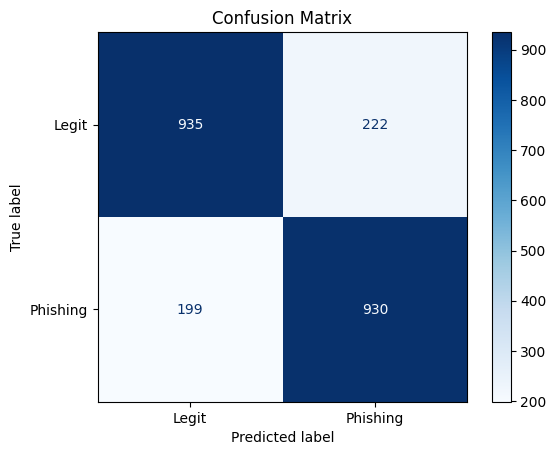

In [73]:
# confusion matrix visual
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit', 'Phishing'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Interpretation:

- True Negatives (TN): 935 → Model correctly predicted class 0

- False Positives (FP): 222 → Model incorrectly predicted class 1 when it was actually 0
- False Negatives (FN): 199 → Model incorrectly predicted class 0 when it was actually 1
- True Positives (TP): 930 → Model correctly predicted class 1

After doing baseline model----

I chose to do the baseline model using logistic regreen because it is a relatively easy model to train and can be interpreted easily. The metrics for the baseline model were all good and resulted in a score of 80 or higher. The confusion matrix is also good since there are not too many FP's or FN's, but with data preprocessing the results will be better.

# Data Preprocessing

In [74]:
# 1. Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop('status', axis=1)
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=df.index)
df_scaled['status'] = df['status']

# assign df_scaled back to df
df=df_scaled
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974,0
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407,1
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,0.0,2.711505,...,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788,1
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217,0
4,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355,0


In [75]:
# 2. Feature selection
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest Classifier to training data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                 Feature  Importance
85          google_index    0.165429
86             page_rank    0.104727
56         nb_hyperlinks    0.082002
83           web_traffic    0.077765
20                nb_www    0.043314
..                   ...         ...
63       ratio_intErrors    0.000000
61  ratio_intRedirection    0.000000
59  ratio_nullHyperlinks    0.000000
8                  nb_or    0.000000
14               nb_star    0.000000

[87 rows x 2 columns]


In [76]:
# 2. Feature Selection
importance_threshold = 0.02

# Get the names of features below the threshold
features_to_drop = importance_df[importance_df['Importance'] < importance_threshold]['Feature'].tolist()

# drop the least important features
df = df.drop(columns=features_to_drop)

In [77]:
print("Remaining features after selection:")
print(df.columns.tolist())

Remaining features after selection:
['nb_www', 'longest_word_path', 'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_extRedirection', 'safe_anchor', 'domain_age', 'web_traffic', 'google_index', 'page_rank', 'status']


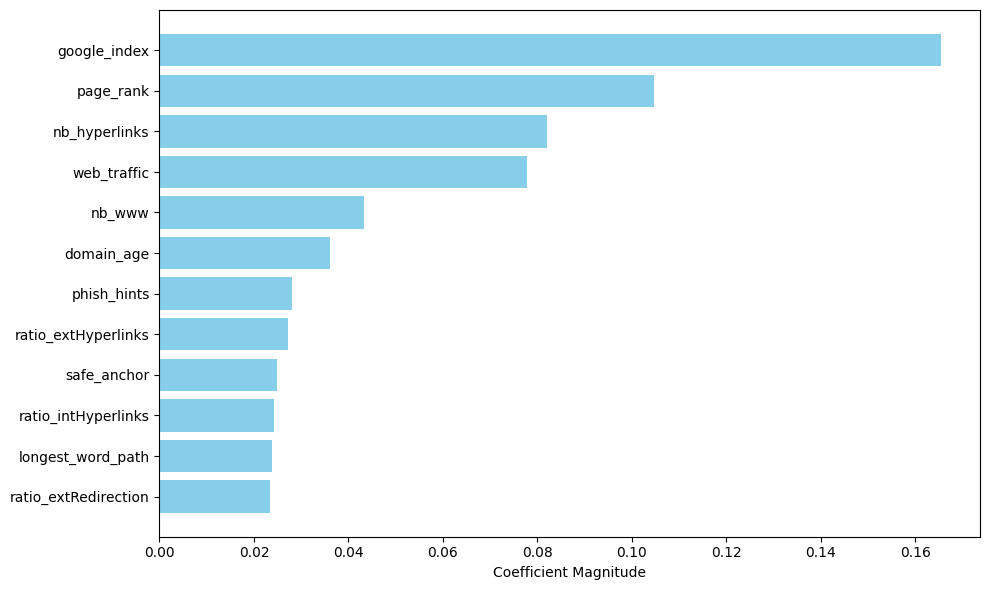

In [78]:
# Plot the top important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:12], importance_df['Importance'][:12], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

Interperetation:

google_index after scaling has the highest/ mpst significant impact in predicting phishing, sites not indexed by google may be suspicious.

In [79]:
# 3. Feature engineering

# a. interaction features
df['page_rank_x_web_traffic'] = df['page_rank'] * df['web_traffic'] # Interaction between page rank and web traffic

# b. polynomial features:
df['google_index_squared'] = df['google_index'] ** 2 # Squaring the google_index feature

# c. Combining features:
df['hyperlinks_ratio'] = df['nb_hyperlinks'] / (df['nb_www'] + 1)  # Ratio of hyperlinks to www occurences (avoiding division by zero)


X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Reasoning for created features ---

Interaction Features: created by multiplying page_rank and web_traffic. This captures the combined effect of these two features. For example, a high page rank with high web traffic might be a stronger indicator of legitimacy than either feature alone.

Polynomial Features: created by squaring the google_index feature. This can help capture non-linear relationships between google_index and the target variable (status).

Combining Features: created by dividing nb_hyperlinks by nb_www (adding 1 to avoid division by zero). This represents the ratio of hyperlinks to the number of times "www" appears in the URL. A higher ratio might indicate a suspicious website.

In [80]:
print("Shape of df after datapreprocessing:",df.shape)
df.head()

Shape of df after datapreprocessing: (11430, 16)


,nb_www,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_extRedirection,safe_anchor,domain_age,web_traffic,google_index,page_rank,status,page_rank_x_web_traffic,google_index_squared,hyperlinks_ratio
0,1.098907,-0.197666,-0.388973,-0.420926,-0.194034,0.605943,2.687711,-0.948614,-1.307594,-0.429340,0.934264,0.320974,0,-0.137807,0.872849,-0.200545
1,-0.893559,0.929003,-0.388973,-0.342965,0.967464,-0.760717,-0.596511,1.610785,0.548471,-0.429340,0.934264,-0.467407,1,0.200677,0.872849,-3.222130
2,-0.893559,0.279002,-0.388973,-0.498886,1.056008,-0.864902,-0.596511,1.610785,-0.018839,2.491612,0.934264,-1.255788,1,-3.128937,0.872849,-4.686997
3,-0.893559,-0.457666,-0.388973,0.370674,0.984697,-0.780995,0.341838,0.651011,-1.307594,-0.375359,-1.070361,-0.073217,0,0.027483,1.145673,3.482452
4,1.098907,0.019001,-0.388973,0.088816,-0.350289,0.789798,1.419202,-0.948614,1.323334,-0.424968,-1.070361,1.109355,0,-0.471440,1.145673,0.042316


# Iterative modeling

In [81]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"ROC AUC: {roc_auc:.3f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-"*20)

    return accuracy, precision, recall, f1, roc_auc

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

# dictionary of models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}:")
    # Fit the model before evaluating
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)
    results[model_name] = metrics

Evaluating Logistic Regression:
Accuracy: 0.926
Precision: 0.923
Recall: 0.927
F1 Score: 0.925
ROC AUC: 0.978
Confusion Matrix:
 [[1070   87]
 [  82 1047]]
--------------------
Evaluating Decision Tree:
Accuracy: 0.931
Precision: 0.925
Recall: 0.936
F1 Score: 0.930
ROC AUC: 0.931
Confusion Matrix:
 [[1071   86]
 [  72 1057]]
--------------------
Evaluating Random Forest:
Accuracy: 0.955
Precision: 0.956
Recall: 0.952
F1 Score: 0.954
ROC AUC: 0.990
Confusion Matrix:
 [[1107   50]
 [  54 1075]]
--------------------
Evaluating Gradient Boosting:
Accuracy: 0.950
Precision: 0.946
Recall: 0.954
F1 Score: 0.950
ROC AUC: 0.989
Confusion Matrix:
 [[1095   62]
 [  52 1077]]
--------------------
Evaluating SVM:
Accuracy: 0.939
Precision: 0.944
Recall: 0.933
F1 Score: 0.938
ROC AUC: 0.982
Confusion Matrix:
 [[1094   63]
 [  76 1053]]
--------------------
Evaluating XGBoost:
Accuracy: 0.961
Precision: 0.965
Recall: 0.955
F1 Score: 0.960
ROC AUC: 0.991
Confusion Matrix:
 [[1118   39]
 [  51 1078]]
-

In [83]:
# Table of metrics
metrics_data = [list(metrics) for metrics in results.values()]
model_names = list(results.keys())
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

all_metrics_df = pd.DataFrame(metrics_data, index=model_names, columns=metric_names)
styled_all_metrics_df = all_metrics_df.style.set_properties(**{'text-align': 'center'}) \
                                            .format("{:.3f}") \
                                            .set_caption("Model Performance Metrics")
display(styled_all_metrics_df)


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.926,0.923,0.927,0.925,0.978
Decision Tree,0.931,0.925,0.936,0.930,0.931
Random Forest,0.955,0.956,0.952,0.954,0.990
Gradient Boosting,0.950,0.946,0.954,0.950,0.989
SVM,0.939,0.944,0.933,0.938,0.982
XGBoost,0.961,0.965,0.955,0.960,0.991


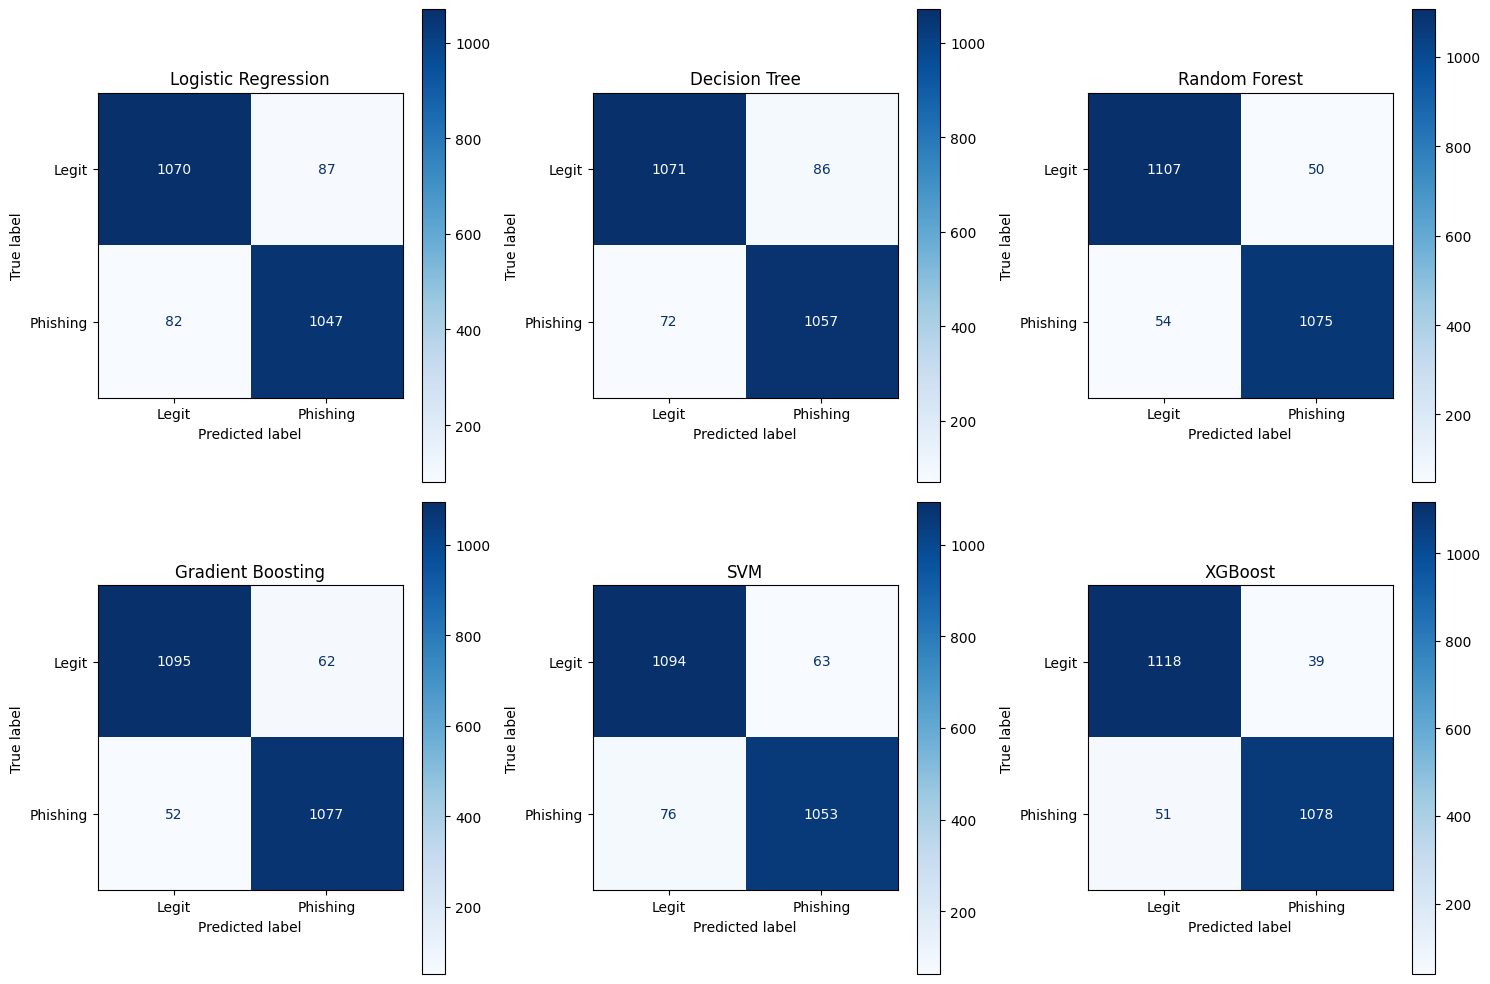

In [84]:
# confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit', 'Phishing'])
    disp.plot(ax=axes[i], cmap=plt.cm.Blues)
    axes[i].set_title(model_name)

plt.tight_layout()
plt.show()

/var/folders/2g/bzsspqkj2kn59n94r77dmyfw0000gn/T/ipykernel_47913/51500583.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=45, ha='right')


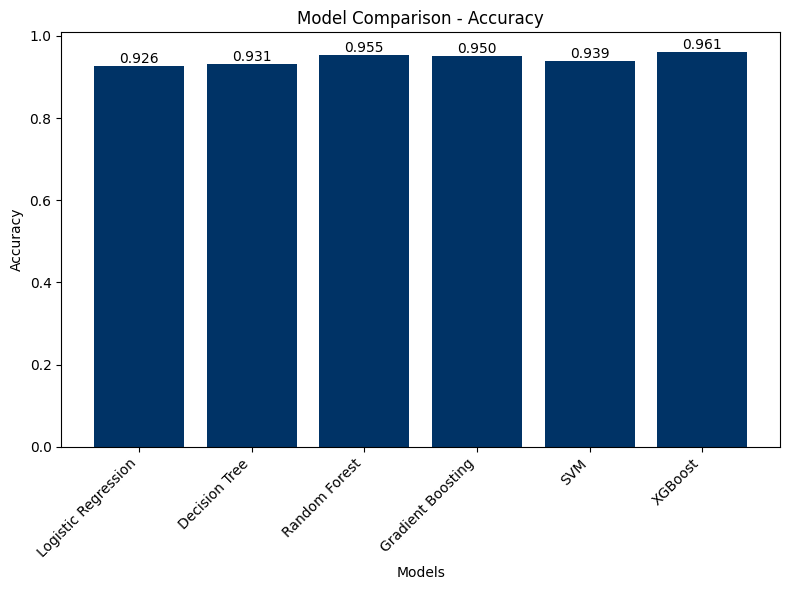

/var/folders/2g/bzsspqkj2kn59n94r77dmyfw0000gn/T/ipykernel_47913/51500583.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=45, ha='right')


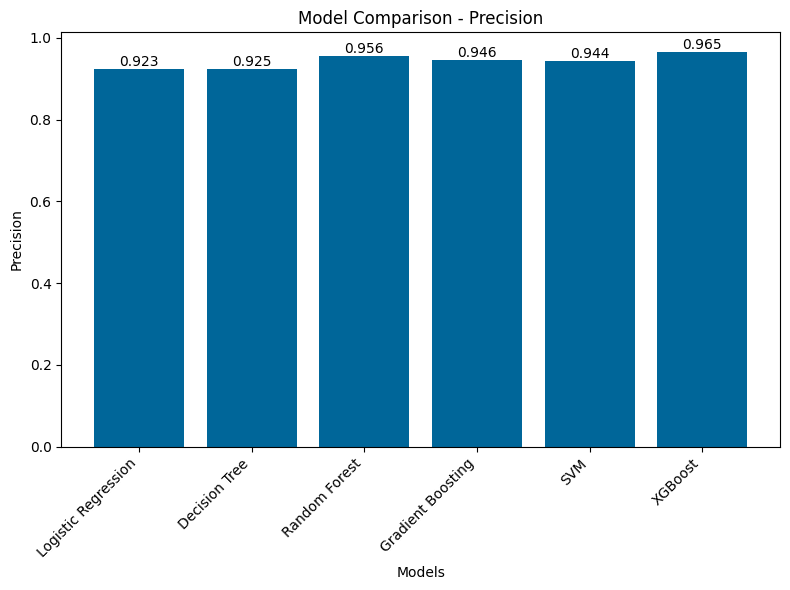

/var/folders/2g/bzsspqkj2kn59n94r77dmyfw0000gn/T/ipykernel_47913/51500583.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=45, ha='right')


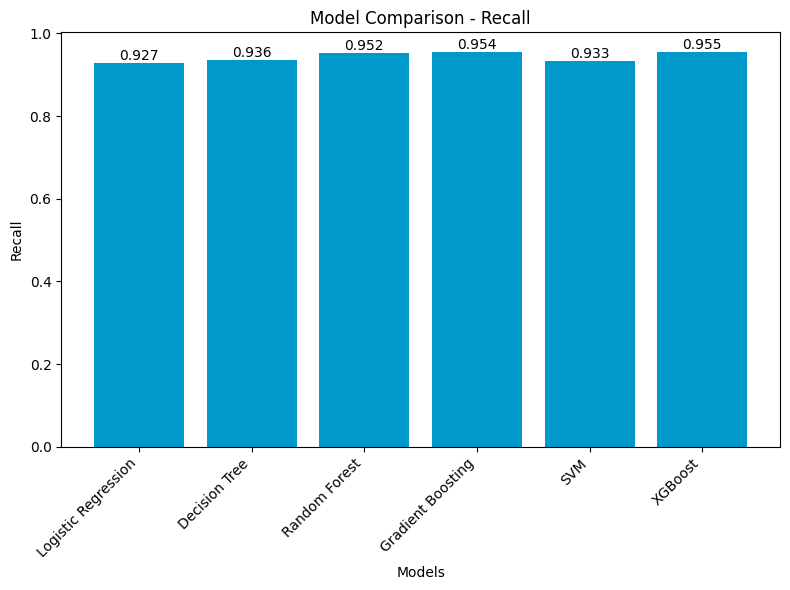

/var/folders/2g/bzsspqkj2kn59n94r77dmyfw0000gn/T/ipykernel_47913/51500583.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=45, ha='right')


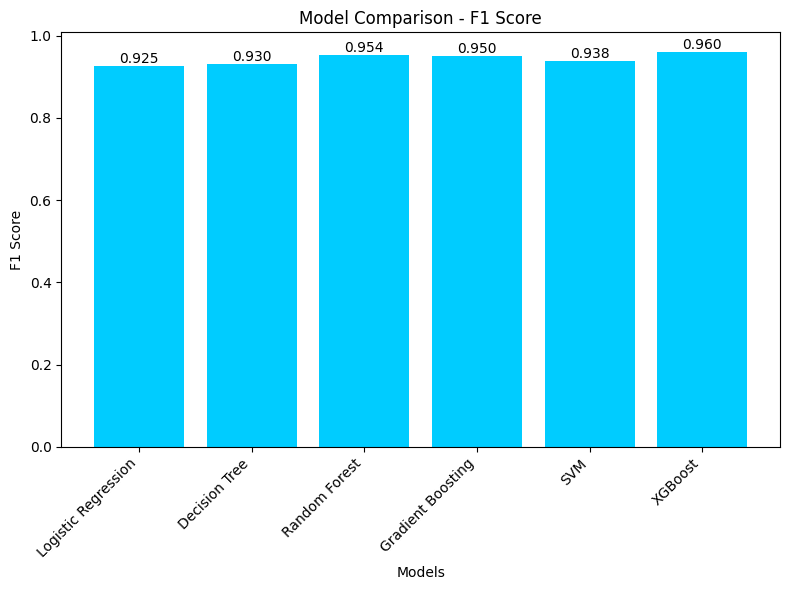

/var/folders/2g/bzsspqkj2kn59n94r77dmyfw0000gn/T/ipykernel_47913/51500583.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=45, ha='right')


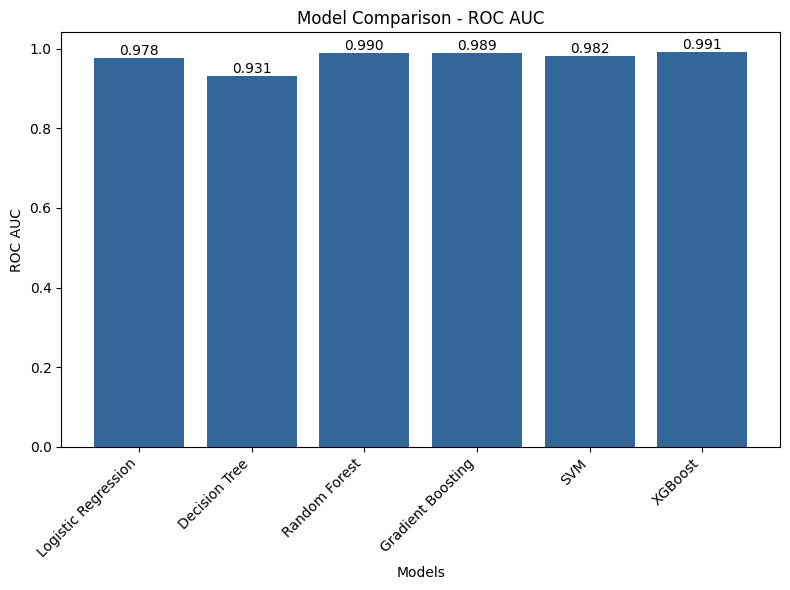

In [85]:
# Visualize the metrics
# Extract metrics and model names from results dictionary
metrics_data = [list(metrics) for metrics in results.values()]
model_names = list(results.keys())
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

colors = ['#003366', '#006699', '#0099CC', '#00CCFF', '#336699']

for i, metric_name in enumerate(metric_names):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(model_names, [metrics[i] for metrics in metrics_data], color=colors[i])
    for bar in bars:
      height = bar.get_height()
      ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}',
                ha='center', va='bottom')
    ax.set_xlabel('Models')
    ax.set_ylabel(metric_name)
    ax.set_title(f'Model Comparison - {metric_name}')
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Interpretation after Data preprocessing and training----

All the models performed relatively well and high. Compared to the basline model the logistic regression model did significantly improve for all the metrics as well as in the confusion matrix. The incorrect number of outputs it produced went down by more than half and it had a higher intepretation of the TN/TP's.

The Random Forest and XGBoost model performed the best out of all the models as they had the highest output for all the metrics and the best confusion matrices, so they will be used for hyperparameter tuning and one will ultimately be chosen as the best performing model.

In order to determine the best performing model I will be using the F1 score metric. The F1 score is a valuable metric because it balances the need to correctly identify phishing websites (recall) with the need to avoid misclassifying legitimate websites as phishing (precision). Having a high F1 score would indiacate that the model has both high precision and high recall, meaning it is good at identifying positive instances and avoiding false positives, which basically means that the model is effective at both catching phishing websites and minimizing false alarms.

In [95]:
# 2. Model parameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

param_grid_rf = {
    'n_estimators': [98, 100, 99],
    'max_depth': [None, 5, 1],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [1, 2,5],
}

param_grid_xgb = {
    'n_estimators': [300, 302, 301],
    'learning_rate': [0.049, 0.055, 0.05],
    'max_depth': [10, 9, 8],
    'subsample': [1, None, .09],
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid_rf,
        scoring='f1',
        cv=5,
        n_jobs=-1,
        verbose=0)
grid_search_rf.fit(X_train, y_train)

grid_search_xgb = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
        param_grid=param_grid_xgb,
        scoring='f1',
        cv=5,
        n_jobs=-1,
        verbose=0)
grid_search_xgb.fit(X_train, y_train)

print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
evaluate_model(grid_search_rf.best_estimator_, X_test, y_test)
print("\nBest parameters for XGBoost:", grid_search_xgb.best_params_)
evaluate_model(grid_search_xgb.best_estimator_, X_test, y_test)



Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 99}
Accuracy: 0.955
Precision: 0.957
Recall: 0.952
F1 Score: 0.955
ROC AUC: 0.990
Confusion Matrix:
 [[1109   48]
 [  54 1075]]
--------------------

Best parameters for XGBoost: {'learning_rate': 0.049, 'max_depth': 10, 'n_estimators': 300, 'subsample': 1}
Accuracy: 0.959
Precision: 0.961
Recall: 0.956
F1 Score: 0.958
ROC AUC: 0.992
Confusion Matrix:
 [[1113   44]
 [  50 1079]]
--------------------


(0.9588801399825022,
 0.9608192341941229,
 0.9557130203720107,
 0.9582593250444049,
 np.float64(0.9915674834813777))


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6, n_estimators=98; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6, n_estimators=99; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=98; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=99; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=98; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=99; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=98; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=99; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=98; 

Reasoning for parameter chosen----

Random Forest is an ensemble method based on decision trees. It works by building multiple decision trees and aggregating their predictions. Some of its key hyperparameters include:

n_estimators: The number of decision trees in the forest.
max_depth: The maximum depth of each tree.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.
XGBoost is a gradient boosting algorithm that builds an ensemble of weak learners (typically decision trees). It focuses on minimizing a loss function by iteratively adding new trees that correct the errors of previous trees. Some of its key hyperparameters are:

n_estimators: The number of boosting rounds (trees).
learning_rate: The step size shrinkage used in update to prevents overfitting.
max_depth: The maximum depth of each tree.
subsample: The fraction of samples used for fitting each tree.

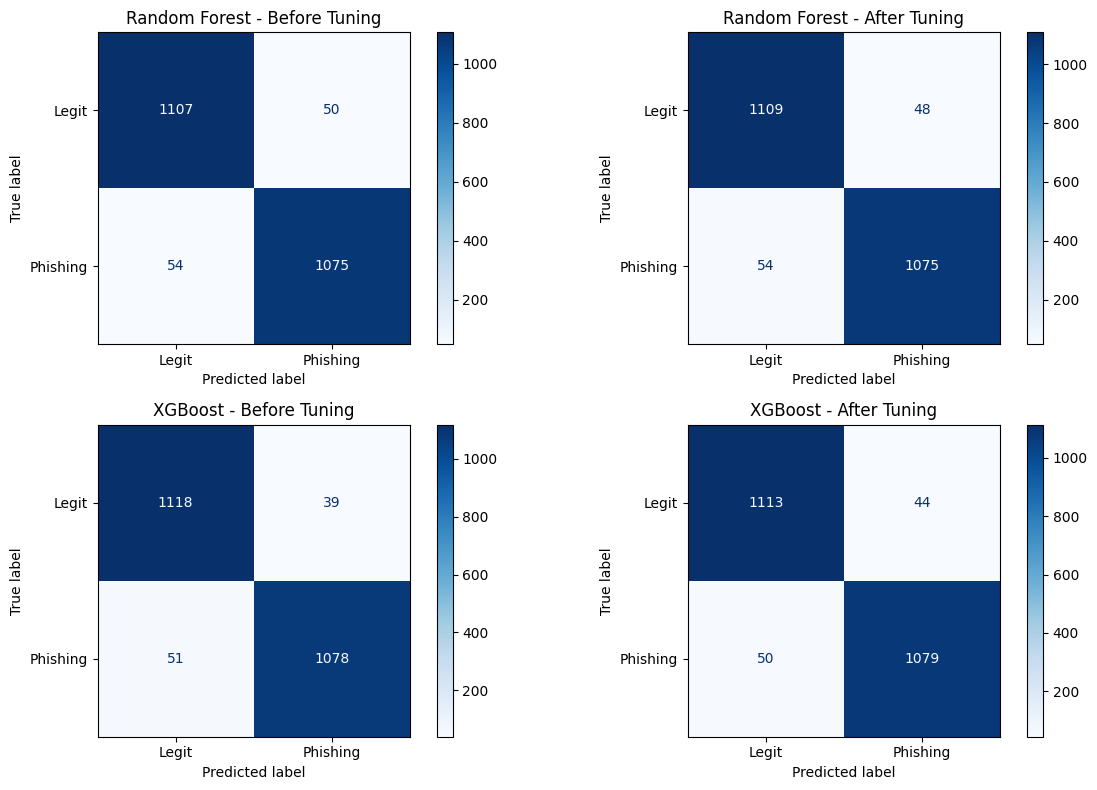

In [96]:
def format_confusion_matrix(cm):
    return 
    
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

# format confusion matrices
cm_rf_before = confusion_matrix(y_test, models['Random Forest'].predict(X_test))
cm_rf_after = confusion_matrix(y_test, grid_search_rf.best_estimator_.predict(X_test))
cm_xgb_before = confusion_matrix(y_test, models['XGBoost'].predict(X_test))
cm_xgb_after = confusion_matrix(y_test, grid_search_xgb.best_estimator_.predict(X_test))

cm_rf_before_formatted = format_confusion_matrix(cm_rf_before)
cm_rf_after_formatted = format_confusion_matrix(cm_rf_after)
cm_xgb_before_formatted = format_confusion_matrix(cm_xgb_before)
cm_xgb_after_formatted = format_confusion_matrix(cm_xgb_after)

# Random Forest - Before Tuning
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_before, display_labels=['Legit', 'Phishing'])
disp.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title("Random Forest - Before Tuning")

# Random Forest - After Tuning
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_after, display_labels=['Legit', 'Phishing'])
disp.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title("Random Forest - After Tuning")

# XGBoost - Before Tuning
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_before, display_labels=['Legit', 'Phishing'])
disp.plot(ax=axes[2], cmap=plt.cm.Blues)
axes[2].set_title("XGBoost - Before Tuning")

# XGBoost - After Tuning
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_after, display_labels=['Legit', 'Phishing'])
disp.plot(ax=axes[3], cmap=plt.cm.Blues)
axes[3].set_title("XGBoost - After Tuning")

plt.tight_layout()
plt.show()

In [98]:
# more parameter tuning
param_grid_xgb = {
    'n_estimators': [300, 299, 298],
    'learning_rate': [.0469, 0.047, .045],
    'max_depth': [10, 12, 11],
    'subsample': [.779, .781, .78, .77],
    'colsample_bytree': [.5, .51],
    'gamma': [.099, .01, .011],
}

grid_search_xgb = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
        param_grid=param_grid_xgb,
        scoring='f1',
        cv=5,
        n_jobs=-1,
        verbose=0)
grid_search_xgb.fit(X_train, y_train)

print("\nBest parameters for XGBoost:", grid_search_xgb.best_params_)
evaluate_model(grid_search_xgb.best_estimator_, X_test, y_test)


Best parameters for XGBoost: {'colsample_bytree': 0.5, 'gamma': 0.011, 'learning_rate': 0.0469, 'max_depth': 10, 'n_estimators': 298, 'subsample': 0.78}
Accuracy: 0.961
Precision: 0.965
Recall: 0.955
F1 Score: 0.960
ROC AUC: 0.993
Confusion Matrix:
 [[1118   39]
 [  51 1078]]
--------------------


(0.9606299212598425,
 0.9650850492390332,
 0.9548272807794509,
 0.9599287622439893,
 np.float64(0.9925091081130533))

After the first round of tuning, both models actually had a slightly decreased f1 score from its original model. Although the scores slightly decreased XGBoost still had the better model. After the second round of tuning for XGBoost model the f1 score went back up to the original score before any parameter tuning. We can infer from this that the original model it the highest f1 score we can can get along with the best confusion matrix or we can assume that if we were to add more parameters than the f1 score may increase.